In [ ]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
data1=pd.read_csv('/content/radar_plot.csv')

In [ ]:
data1

,Team,gls,ast,ga,gwopk,gawpk
0,Sevilla,1.34,1.05,2.39,1.29,2.34
1,A_Madrid,1.66,1.18,2.84,1.55,2.74
2,Barcelona,1.79,1.37,3.16,1.63,3.00
3,R_Madrid,2.11,1.55,3.66,1.89,3.45


In [ ]:
import plotly.graph_objects as go

categories = ['gls','ast','ga',
           'gwopk', 'gawpk']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1.34, 1.05, 2.39, 1.29,2.34],
      theta=categories,
        fill='toself',
      name='Sevilla'
))
fig.add_trace(go.Scatterpolar(
      r=[1.66,1.18,2.84,1.55,2.74],
        fill='toself',
      theta=categories,
      name='Atletico Madrid'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=False
)

fig.show()

In [ ]:
categories = ['gls','ast','ga',
           'gwopk', 'gawpk']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1.34, 1.05, 2.39, 1.29,2.34],
      theta=categories,
        fill='toself',
      name='Sevilla'
))
fig.add_trace(go.Scatterpolar(
      r=[1.79,1.37 ,3.16,1.63,3.00],
        fill='toself',
      theta=categories,
      name='Barcelona'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3.5]
    )),
  showlegend=False
)

fig.show()

In [ ]:
categories = ['gls','ast','ga',
           'gwopk', 'gawpk']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1.34, 1.05, 2.39, 1.29,2.34],
      theta=categories,
        fill='toself',
      name='Sevilla'
))
fig.add_trace(go.Scatterpolar(
      r=[2.11,1.55,3.66,1.89,3.45],
        fill='toself',
      theta=categories,
      name='R_MAdrid'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=False
)

fig.show()

# Linear Regression

*In this is going to apply a simple linear regression model to squad value data against performance in the La-Liga. This might help us to see how much a squad might need to invest to avoid relegation, make  a data-driven target for our team.*

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/l_regg.csv",encoding='latin1')
data

,League,Season,Team,Squad,Average Age,Foreign Players,Squad Value,Avg Player Value,GD,Points,Position
0,LALIGA,2011,FC Barcelona,35,24.9,11,618.20,17.66,85,91,2
1,LALIGA,2011,Real Madrid,33,24.8,16,539.20,16.34,89,100,1
2,LALIGA,2011,Atlético de Madrid,37,24.4,17,210.00,5.68,7,56,5
3,LALIGA,2011,Valencia CF,28,25.6,13,181.00,6.46,15,61,3
4,LALIGA,2011,Athletic Bilbao,30,25.2,2,144.20,4.81,-3,49,10
...,...,...,...,...,...,...,...,...,...,...,...
215,LALIGA,2021,RCD Mallorca,41,25.7,15,74.15,1.81,-27,39,16
216,LALIGA,2021,Elche CF,37,27.4,13,72.98,1.97,-12,42,13
217,LALIGA,2021,Cádiz CF,37,27.3,14,67.80,1.83,-16,39,17
218,LALIGA,2021,Rayo Vallecano,36,26.2,14,67.20,1.87,-11,42,12


In [ ]:
data.describe()

,Season,Squad,Average Age,Foreign Players,Squad Value,Avg Player Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000
mean,2016.000000,33.918182,25.821818,12.659091,187.173409,28.368545,-0.209091,52.286364,10.50000
std,3.169489,4.150440,0.987907,5.318801,226.778132,112.317505,27.883514,17.316680,5.78338
min,2011.000000,25.000000,23.600000,0.000000,1.380000,0.970000,-54.000000,20.000000,1.00000
25%,2013.000000,31.000000,25.100000,9.000000,53.000000,1.850000,-19.000000,41.000000,5.75000
50%,2016.000000,33.000000,25.750000,13.000000,89.140000,3.725000,-6.500000,48.000000,10.50000
75%,2019.000000,37.000000,26.500000,16.250000,215.325000,8.992500,11.500000,60.250000,15.25000
max,2021.000000,47.000000,28.300000,26.000000,1160.000000,1009.000000,89.000000,100.000000,20.00000


For each of the teams, we get squad sizes, ages, squad value (in Euros, million) as well as performance data with goal difference, points & position. The values are taken from Transfermarkt (once again, you can find the data

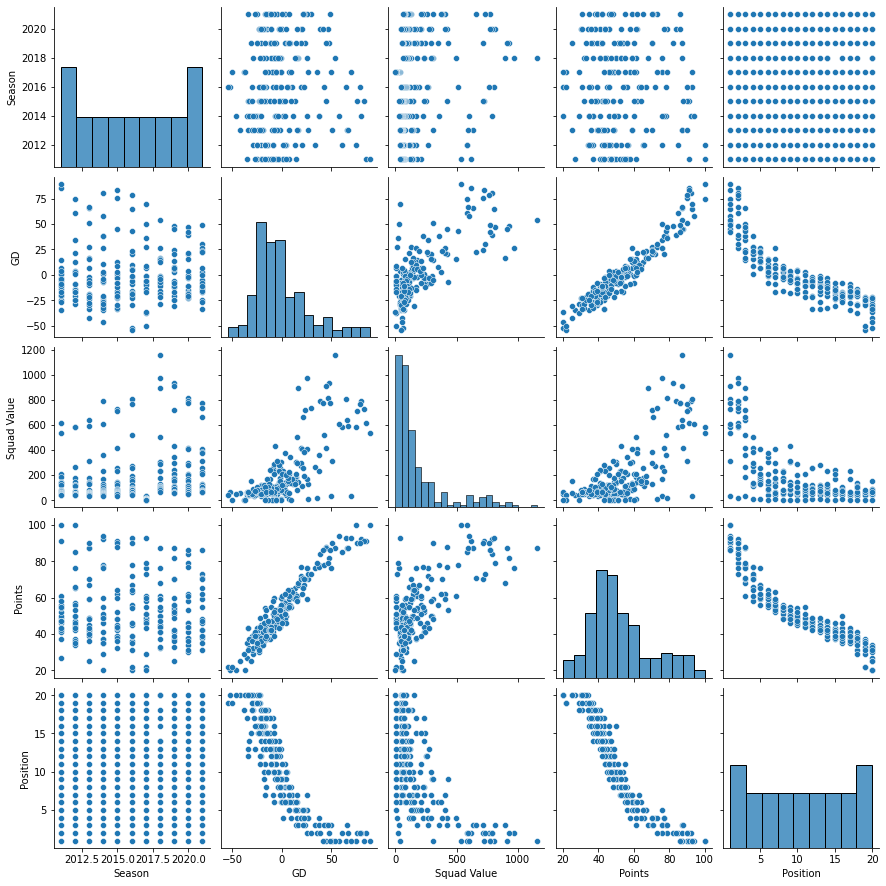

In [ ]:
sns.pairplot(data[['Season','GD', 'Squad Value', 'Points', 'Position']]) 

Points & goal difference correlate really strongly, as WE might expect.
Squad value goes up as goal difference and points go up, but as more of a curve than a line.
Squad value has increased over time.

# MODEL BUILDING

In [ ]:
X = data['Squad Value']
y = data['Points']

In [ ]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
#Use the train_test_split function to create our training sets & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
print(lm.coef_)

[[0.05492423]]


*So on average, an extra million gets you 0.05 points. Looks like we’re going to need an absolute warchest to stay up.*

Text(0.5, 1.0, 'LALIGA vs points - Model One')

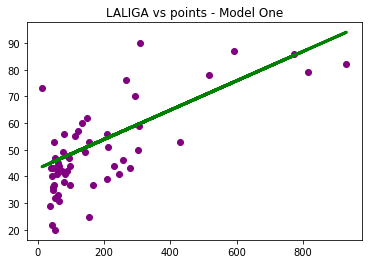

In [ ]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("LALIGA vs points - Model One")

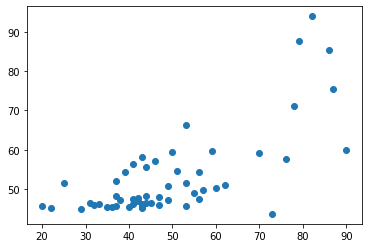

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


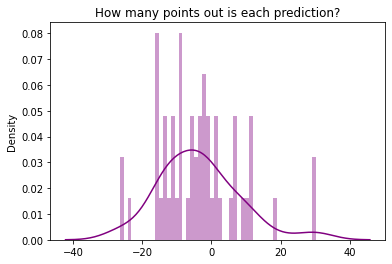

In [ ]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions),bins=50, color = 'purple')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error: 9.596805064344696


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head()

,Actual,Predicted
0,36,45.501719
1,56,47.352665
2,41,46.071832
3,86,85.376709
4,62,51.043574


In [ ]:
df['Actual'].corr(df['Predicted'])

0.714212136142949

#Improving the model

When we took an exploratory look at the data, we found that team values had increased over seasons. As such, comparing a 100m squad in 2011 to a 100m squad in 2021 probably isn’t fair.

To counter this, we are going to create a new ‘Relative Value’ column. This will take each team in a season, and divide it by the highest value in that league. These values will be between 0 & 1 and give a better impression of comparative buying power, hence performance in the league. Hopefully it will provide for a better model than the example above.

In [ ]:
#Blank list
relativeValue = []

#Loop through each row
for index, team in data.iterrows():
    
    #Obtain which season we are looking at
    season = team['Season']
    
    #Create a new dataframe with just this season
    teamseason = data[data['Season'] == season]
    
    #Find the max value
    maxvalue = teamseason['Squad Value'].max()
    
    #Divide this row's value by the max value for the season
    tempRelativeValue = team['Squad Value']/maxvalue
    
    #Append it to our list
    relativeValue.append(tempRelativeValue)
    
#Add list to new column in main dataframe
data["Relative Value"] = relativeValue

data.head()

,League,Season,Team,Squad,Average Age,Foreign Players,Squad Value,Avg Player Value,GD,Points,Position,Relative Value
0,LALIGA,2011,FC Barcelona,35,24.9,11,618.2,17.66,85,91,2,1.000000
1,LALIGA,2011,Real Madrid,33,24.8,16,539.2,16.34,89,100,1,0.872210
2,LALIGA,2011,Atlético de Madrid,37,24.4,17,210.0,5.68,7,56,5,0.339696
3,LALIGA,2011,Valencia CF,28,25.6,13,181.0,6.46,15,61,3,0.292786
4,LALIGA,2011,Athletic Bilbao,30,25.2,2,144.2,4.81,-3,49,10,0.233258


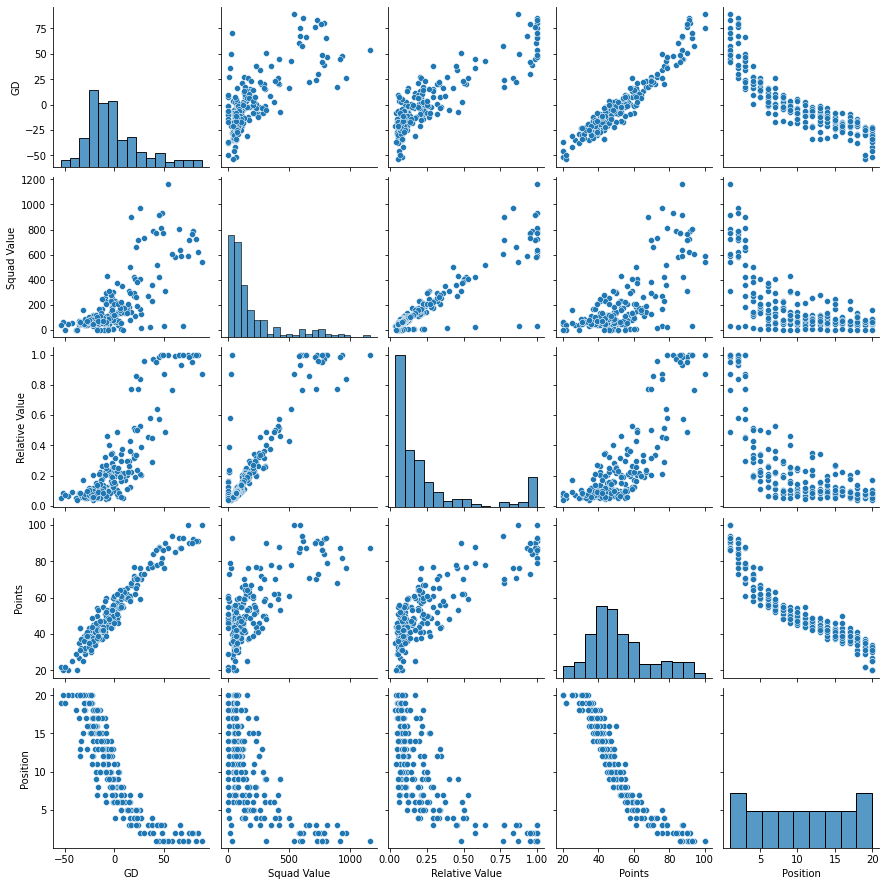

In [ ]:
sns.pairplot(data[['GD', 'Squad Value', 'Relative Value', 'Points', 'Position']])

Looks quite similar to the squad value relationships in many parts, but looks to have a stronger correlation with points and goal difference. Hopefully this will give us a more accurate model. Let’s create a new one in the same way as above

In [ ]:
#Assign relevant columns to variables and reshape them
X = data['Relative Value']
y = data['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Create training and test sets for each of the two variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#Create an empty model, then train it against the variables
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

*And we’ll again look at the coefficient to see what our model tells us to expect. We’ll divide it by 10, to see how many points increasing our squad value by 10% of the most expensive team should earn*

In [ ]:
print(lm.coef_/10)

[[5.14277478]]


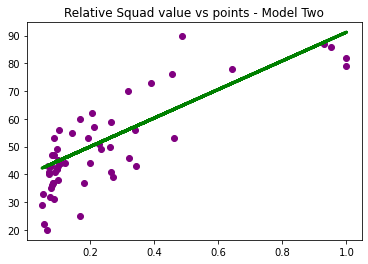

In [ ]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("Relative Squad value vs points - Model Two")
plt.show()

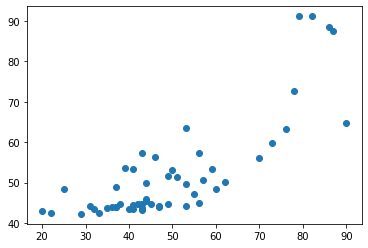

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


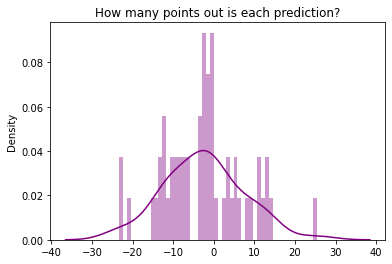

In [ ]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions),bins=50,color='purple');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 7.864259758221318


17.2% improvement nearly in the model than the previus model .